In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Mobiles_Dataset.csv')

# Exploring the data

In [3]:
df

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...
...,...,...,...,...,...,...,...,...,...,...,...,...
979,Kechaoda A27,"₹1,499",₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
980,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
981,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
982,Kechaoda A27,"₹1,499",₹930,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


In [5]:
df.shape

(984, 12)

In [6]:
df.dtypes

Product Name            object
Actual price            object
Discount price          object
Stars                  float64
Rating                  object
Reviews                 object
RAM (GB)                object
Storage (GB)            object
Display Size (inch)    float64
Camera                  object
Description             object
Link                    object
dtype: object

# Cleaning

In [7]:
df.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 76
Description             0
Link                    0
dtype: int64

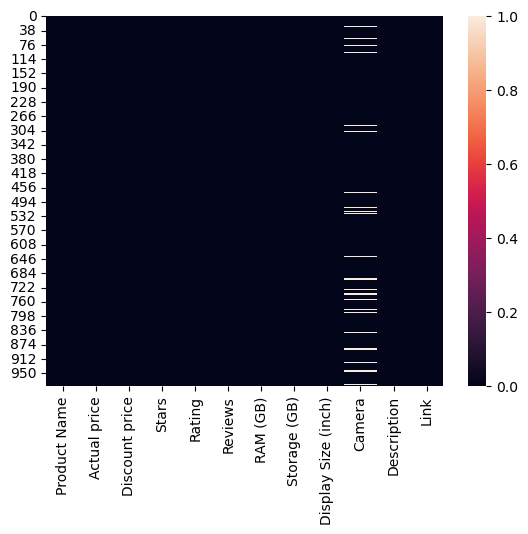

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

In [10]:
# Function to clean price values
def clean_price(price):
    if isinstance(price, str):
        price = price.replace("₹", "").replace(",", "").strip()
        return int(price) if price.isdigit() else np.nan
    return np.nan

df["Actual price"] = df["Actual price"].apply(clean_price)
df["Discount price"] = df["Discount price"].apply(clean_price)


# Data Analysis

In [11]:
# Calculate discount percentage
df["Discount %"] = ((df["Actual price"] - df["Discount price"]) / df["Actual price"]) * 100

# Function to extract numeric values
def extract_numeric(value):
    if isinstance(value, str):
        num = ''.join(filter(str.isdigit, value))
        return int(num) if num else np.nan
    return np.nan

df["RAM (GB)"] = df["RAM (GB)"].apply(extract_numeric)
df["Storage (GB)"] = df["Storage (GB)"].apply(extract_numeric)

In [12]:
df["Discount %"]

0      17.086683
1      17.086683
2      17.086683
3      42.552128
4      23.530796
         ...    
979    35.490327
980    34.956638
981    34.956638
982    37.958639
983    35.490327
Name: Discount %, Length: 984, dtype: float64

In [13]:
# Function to extract numeric values
def extract_numeric(value):
    if isinstance(value, str):
        num = ''.join(filter(str.isdigit, value))
        return int(num) if num else np.nan
    return np.nan

df["RAM (GB)"] = df["RAM (GB)"].apply(extract_numeric)
df["Storage (GB)"] = df["Storage (GB)"].apply(extract_numeric)

In [14]:
# Extract primary camera megapixels
df["Primary Camera (MP)"] = df["Camera"].str.extract(r'(\d+)').astype(float)

In [15]:
df["Primary Camera (MP)"]

0      48.0
1      48.0
2      48.0
3      50.0
4      50.0
       ... 
979     0.0
980     NaN
981     NaN
982     0.0
983     0.0
Name: Primary Camera (MP), Length: 984, dtype: float64

In [16]:
#  1. Extract brand name from product name

df["Brand"] = df["Product Name"].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)

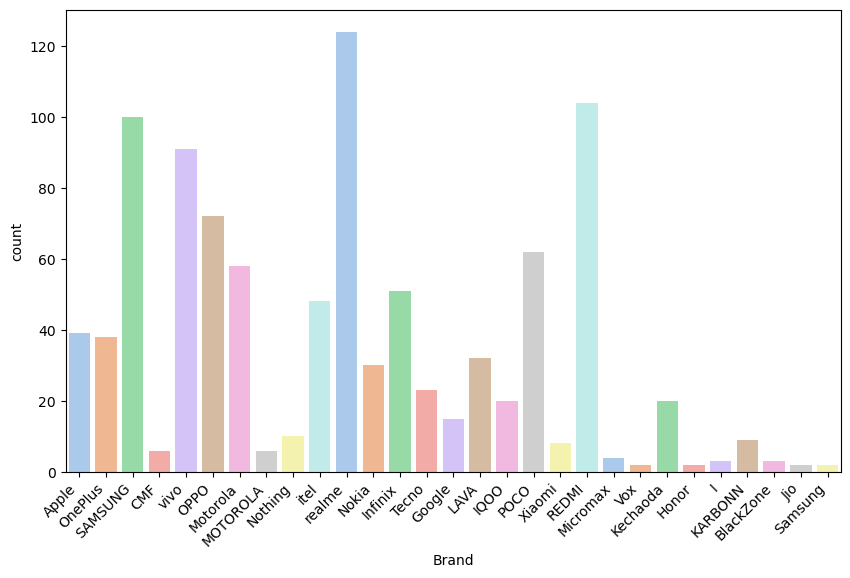

In [17]:
# Brand count
df['Brand'].value_counts()

plt.figure(figsize=(10, 6))

# Create the count plot and store the Axes object
ax = sns.countplot(data=df, x='Brand', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
df['RAM (GB)'].value_counts()

Series([], Name: RAM (GB), dtype: int64)

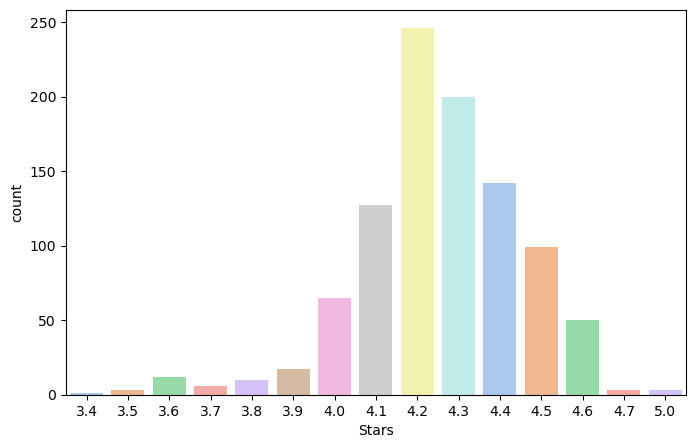

In [19]:
# 2 ratings 

df['Stars'].value_counts()

plt.figure(figsize=(8, 5))

# Create the count plot and store the Axes object
ax = sns.countplot(data=df, x='Stars', palette='pastel')



In [20]:
# Drop unnecessary columns (e.g., links, descriptions if not needed)
df.drop(columns=["Link", "Description"], inplace=True, errors='ignore')


In [21]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Discount %,Primary Camera (MP),Brand
0,"Apple iPhone 15 (Green, 128 GB)",79600.0,65999.0,4.6,"44,793 Ratings","2,402 Reviews",NaN,NaN,6.10,48MP + 12MP,17.086683,48.0,Apple
1,"Apple iPhone 15 (Blue, 128 GB)",79600.0,65999.0,4.6,"44,793 Ratings","2,402 Reviews",NaN,NaN,6.10,48MP + 12MP,17.086683,48.0,Apple
2,"Apple iPhone 15 (Black, 128 GB)",79600.0,65999.0,4.6,"44,793 Ratings","2,402 Reviews",NaN,NaN,6.10,48MP + 12MP,17.086683,48.0,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999.0,11489.0,4.0,"1,005 Ratings",41 Reviews,NaN,NaN,6.56,50MP,42.552128,50.0,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999.0,12999.0,4.0,"1,005 Ratings",41 Reviews,NaN,NaN,6.56,50MP,23.530796,50.0,OnePlus


In [22]:
print(df["RAM (GB)"].isna().sum())  # Check NaN count
print(df["RAM (GB)"].dtype)  # Check data type
print(df["RAM (GB)"].unique())  # Check unique values


984
float64
[nan]


In [23]:
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"], errors="coerce")  


In [24]:
df["RAM (GB)"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
979   NaN
980   NaN
981   NaN
982   NaN
983   NaN
Name: RAM (GB), Length: 984, dtype: float64

In [25]:
if not df["RAM (GB)"].dropna().empty and not df["RAM (GB)"].mode().empty:
    ram_mode = df["RAM (GB)"].mode().iloc[0]
else:
    ram_mode = 4  # Default fallback value (adjust as needed)

df.fillna({"RAM (GB)": ram_mode}, inplace=True)


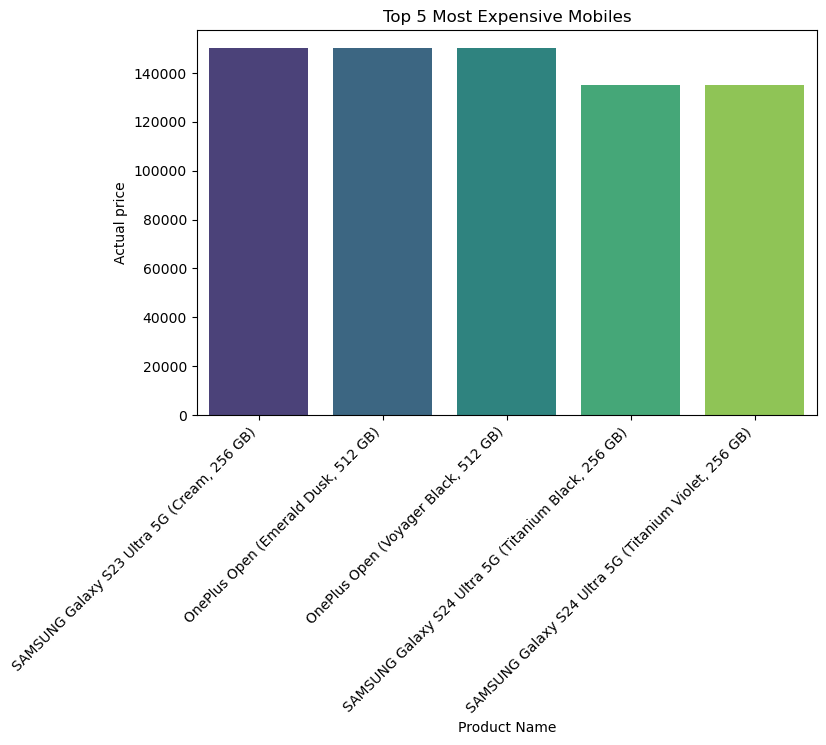

In [26]:
# 3. Top 5 most expensive mobiles

plt.figure(figsize=(8,5))
sns.barplot(data=df.nlargest(5, "Actual price"), x="Product Name", y="Actual price", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 Most Expensive Mobiles")
plt.show()

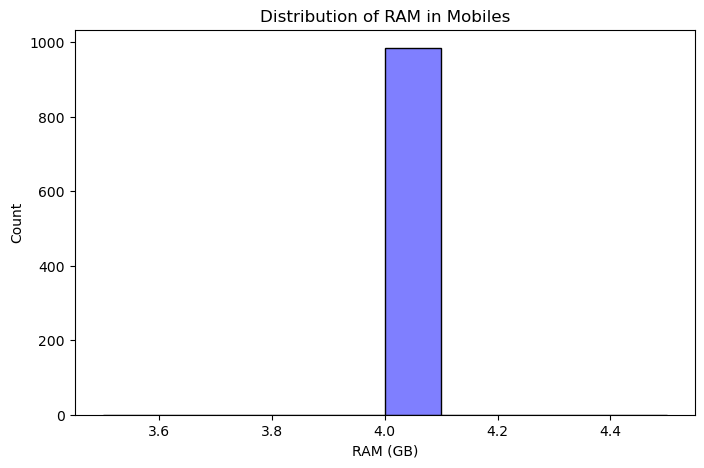

In [27]:
# 4. Distribution of RAM in mobiles

plt.figure(figsize=(8,5))
sns.histplot(df["RAM (GB)"].dropna(), bins=10, kde=True, color="blue")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.title("Distribution of RAM in Mobiles")
plt.show()


In [28]:
# 5. Average discount percentage

avg_discount = df["Discount %"].mean()
print(f"Average Discount Percentage: {avg_discount:.2f}%")

Average Discount Percentage: 21.74%


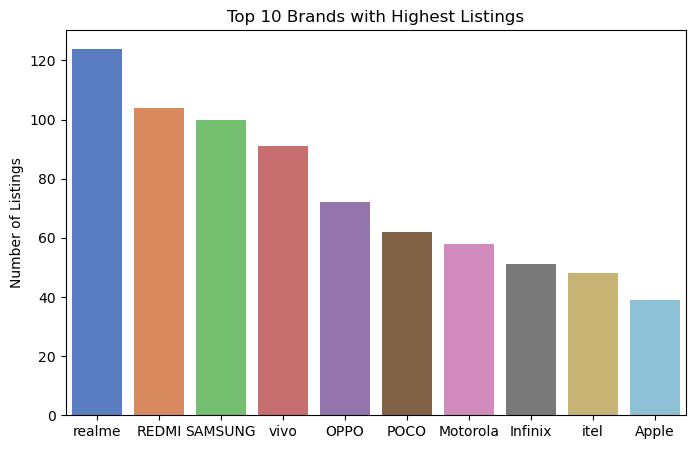

In [29]:
# 6. Brand with the highest number of listings

top_brands = df["Brand"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="muted")
plt.title("Top 10 Brands with Highest Listings")
plt.ylabel("Number of Listings")
plt.show()

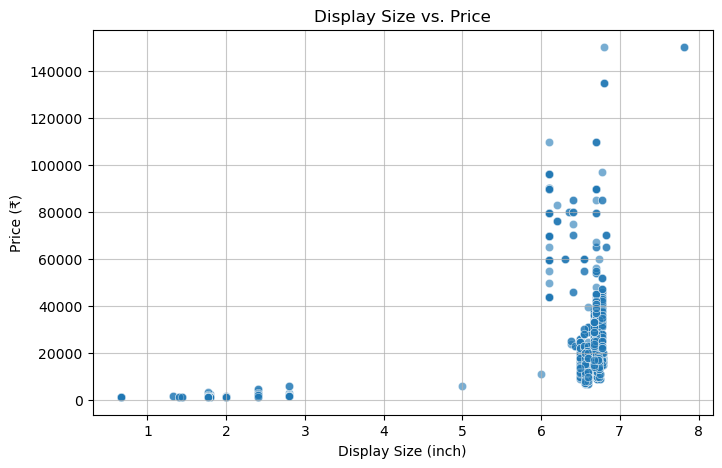

In [30]:
# 7. Relationship between display size and price

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Display Size (inch)", y="Actual price", alpha=0.6)
plt.grid(True, linestyle="-", alpha=0.7)
plt.xlabel("Display Size (inch)")
plt.ylabel("Price (₹)")
plt.title("Display Size vs. Price")
plt.show()


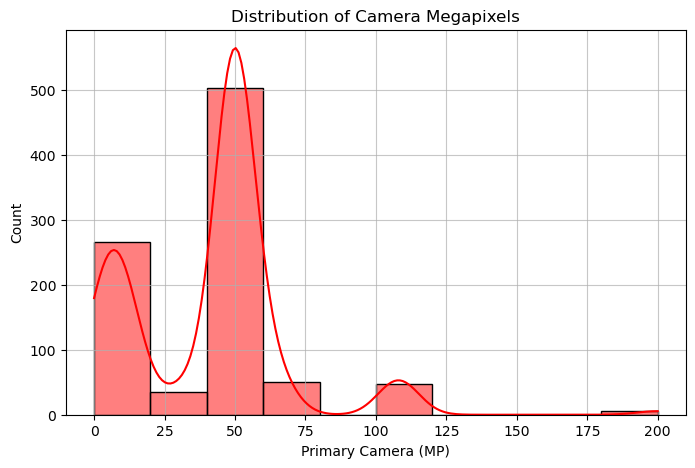

In [31]:
# 8. Distribution of camera megapixels

plt.figure(figsize=(8,5))
sns.histplot(df["Primary Camera (MP)"].dropna(), bins=10, kde=True, color="red")
plt.grid(True, linestyle="-", alpha=0.7)
plt.xlabel("Primary Camera (MP)")
plt.ylabel("Count")
plt.title("Distribution of Camera Megapixels")
plt.show()

In [32]:
# 9. Top-selling mobiles based on discount price

top_selling = df.nsmallest(5, "Discount price")
print("Top 5 Top-Selling Mobiles Based on Discount Price:")
print(top_selling[["Product Name", "Brand", "Discount price"]])


Top 5 Top-Selling Mobiles Based on Discount Price:
                     Product Name     Brand  Discount price
94                        Vox V16       Vox           809.0
532                       Vox V16       Vox           809.0
877  LAVA Hero 600i Sapphire Blue      LAVA           839.0
878  LAVA Hero 600i Sapphire Blue      LAVA           839.0
79                    Micromax J3  Micromax           842.0
